In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.0.0-rc0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

W0904 13:22:19.050708 140021956069184 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [4]:
tokenizer = info.features['text'].encoder

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)

In [12]:
train_data = train_data.padded_batch(BATCH_SIZE, train_data.output_shapes)
test_data = test_data.padded_batch(BATCH_SIZE, test_data.output_shapes)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
NUM_EPOCHS = 10
history = model.fit(train_data, epochs=NUM_EPOCHS, validation_data=test_data)

Epoch 1/10


W0904 13:56:34.543306 140021956069184 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 448s 1s/step - loss: 0.5702 - accuracy: 0.6914 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 474s 1s/step - loss: 0.4037 - accuracy: 0.8257 - val_loss: 0.4928 - val_accuracy: 0.7763
Epoch 3/10
391/391 [==============================] - 468s 1s/step - loss: 0.4522 - accuracy: 0.7988 - val_loss: 0.5138 - val_accuracy: 0.7854
Epoch 4/10
391/391 [==============================] - 471s 1s/step - loss: 0.4868 - accuracy: 0.7649 - val_loss: 0.5007 - val_accuracy: 0.7846
Epoch 5/10
391/391 [==============================] - 470s 1s/step - loss: 0.5099 - accuracy: 0.7580 - val_loss: 0.5205 - val_accuracy: 0.7729
Epoch 6/10
391/391 [==============================] - 467s 1s/step - loss: 0.3473 - accuracy: 0.8574 - val_loss: 0.4866 - val_accuracy: 0.8030
Epoch 7/10
391/391 [==============================] - 473s 1s/step - loss: 0.2352 - accuracy: 0.9108 - val_loss: 0.3967 - val_accuracy: 0.8402
Ep

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

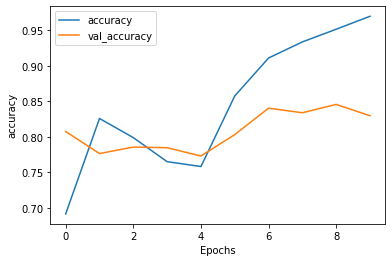

In [30]:
plot_graphs(history, 'accuracy');

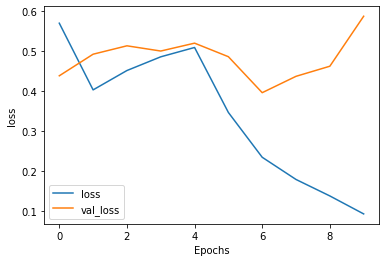

In [31]:
plot_graphs(history, 'loss');